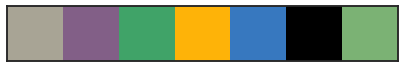

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf
from pprint import pprint
import re as re

from statsmodels.regression.mixed_linear_model import MixedLMResults

import scipy as sp
#from scipy.stats import nanmean
#from scipy.stats import nanstd
import copy
import scipy.stats as stats
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pprint import pprint
import seaborn as sns
sns.set(style="white", context="talk")
custom_palette = [ "greyish", "dusty purple", "greenish", "amber", "windows blue", "black","faded green"]  
                     #"green blue", "dull green", "faded green",  
sns.set_palette(sns.xkcd_palette(custom_palette))
current_palette = sns.color_palette()
%matplotlib inline
sns.palplot(current_palette)

import warnings
warnings.filterwarnings('ignore')


In [2]:
round_data = pd.read_csv('./all_studies_round_data.csv')

round_data['group'] = 1 #this is only for the crossed mixed effect model

game_rounds = pd.read_csv('./all_studies_game_data.csv')
#round_data = round_data[round_data.round_index > 3]
#print(round_data.size)
conditions = ['dynamic_full_feedback',
              'dynamic',         
              'dynamic_self_feedback',
              'dynamic_no_feedback',
              'static',
              'solo_feedback',
              'solo_no_feedback'
             ]


colors ={'dynamic_no_feedback':'#196FFF',
         'dynamic_self_feedback':'#000000',
         'dynamic_full_feedback':'#E89468',
         'dynamic': '#81B200',
         'static':'#9B59B6',
         'solo_feedback': '#95A5A6',
         'solo_no_feedback': '#95A5A6'
        }


linestyles ={'dynamic_no_feedback':'-.',
         'dynamic_self_feedback':':',
         'dynamic_full_feedback':'-',
         'dynamic': '-',
         'static':'--',
         'solo_feedback': '-',
         'solo_no_feedback': '-'
        }

markers ={'dynamic_no_feedback':'d',
         'dynamic_self_feedback':'^',
         'dynamic_full_feedback':'p',
         'dynamic': 'o',
         'static':'*',
         'solo_feedback': 'H',
         'solo_no_feedback': 'h'
        }

#markers = ['s','o','*']
#linestyles = ['--','-',':','-.']
tick_size = 25
label_size = 35




studies = [1,2]
#crossed model with no independent groups https://stackoverflow.com/questions/50052421/mixed-models-with-two-random-effects-statsmodels
# this is used as a variance component for the individual level stuff
vcf = {"player_id": "0 + C(player_id)", "game_id": "0 + C(game_id)"} 


# Fig.2 Panels (A) and (C)

dynamic o
static *
solo_feedback H
dynamic o
static *
solo_feedback H
dynamic_no_feedback d
dynamic_full_feedback p
dynamic_self_feedback ^
solo_no_feedback h
dynamic_no_feedback d
dynamic_full_feedback p
dynamic_self_feedback ^
solo_no_feedback h


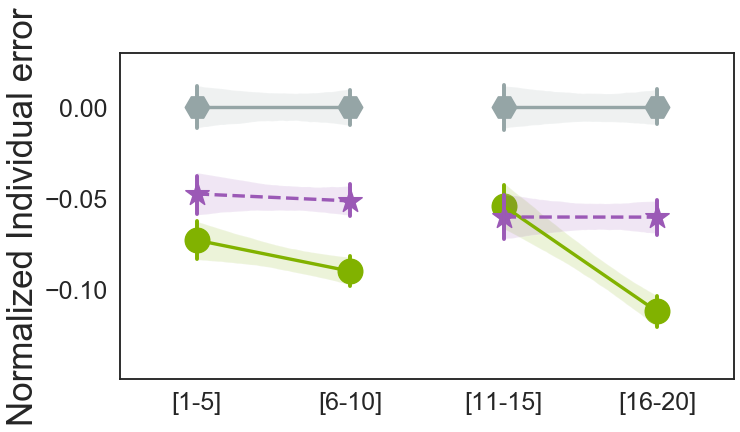

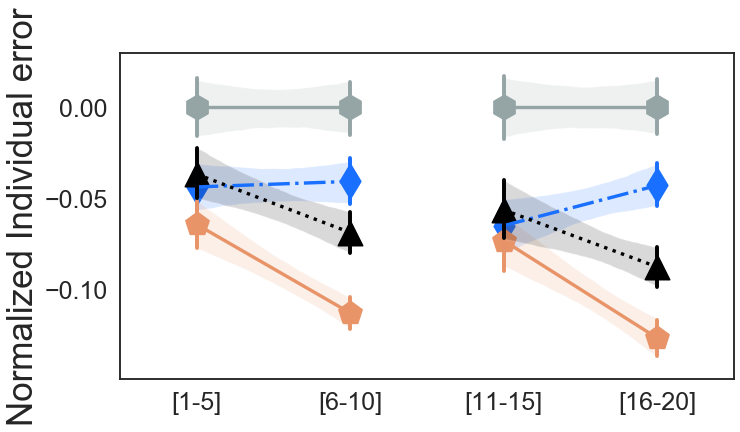

In [3]:
x_formatter = ticker.FixedFormatter([
    "[1-5]", "[6-10]", "[11-15]", "[16-20]"])
x_locator = ticker.FixedLocator([1, 2, 3, 4])


for study_number in studies:
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111)
    for half in range(1,2+1):
        for condition in round_data[round_data.study==study_number].condition.unique():
            print(condition,markers[condition])
            sns.regplot(x="quarter",
                        y="revised_error_relative2solo",
                        data=round_data[(round_data.half==half) & (round_data.condition==condition)],
                        x_estimator=np.mean, ax=ax,
                        truncate=True,
                        marker=markers[condition],
                        color=colors[condition],
                        line_kws = {'linestyle':linestyles[condition]},
                        scatter_kws ={'s':600},
                    
                        fit_reg=True,
                        ci=95,
                        label=condition,
                       )
            
    ax.set_xlabel("",fontsize=label_size)
    ax.set_ylabel('Normalized Individual error',fontsize=label_size)

    ax.set_xlim(0.5,4.5)
    ax.set_ylim(-0.149,0.03)

    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)

    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    
    ax.tick_params(labelsize=tick_size)




# Fig.2 Panels (B) and (D)

static *
dynamic o
solo_feedback H
static *
dynamic o
solo_feedback H
dynamic_no_feedback d
dynamic_self_feedback ^
dynamic_full_feedback p
solo_no_feedback h
dynamic_no_feedback d
dynamic_self_feedback ^
dynamic_full_feedback p
solo_no_feedback h


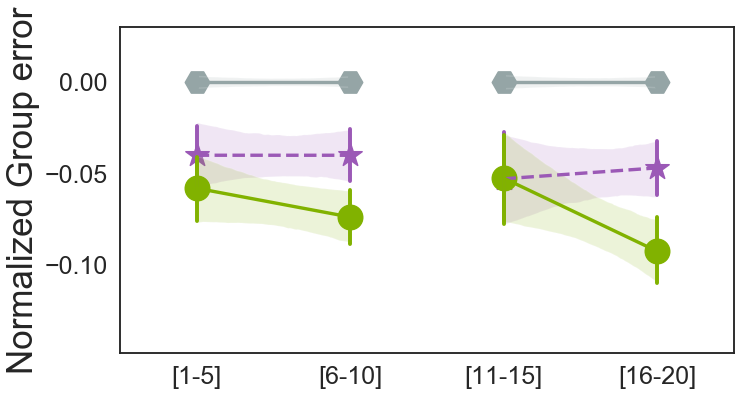

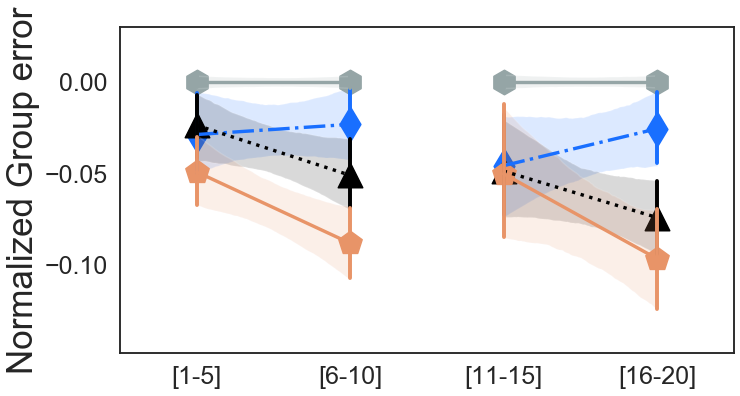

In [4]:
x_formatter = ticker.FixedFormatter([
    "[1-5]", "[6-10]", "[11-15]", "[16-20]"])
x_locator = ticker.FixedLocator([1, 2, 3, 4])




for study_number in studies:
    fig = plt.figure(figsize=(11,6))
    ax = fig.add_subplot(111)
    for half in range(1,2+1):
        for condition in game_rounds[game_rounds.study==study_number].condition.unique():
            print(condition,markers[condition])
            sns.regplot(x="quarter",
                        y="revised_error_relative2solo",
                        data=game_rounds[(game_rounds.half==half) & (game_rounds.condition==condition)],
                        x_estimator=np.mean, ax=ax,
                        truncate=True,
                        marker=markers[condition],
                        color=colors[condition],
                        line_kws = {'linestyle':linestyles[condition]},
                        scatter_kws ={'s':600},
                        
                        fit_reg=True,
                        ci=95,
                        label=condition,
                       )
            
    ax.set_xlabel("",fontsize=label_size)
    ax.set_ylabel('Normalized Group error',fontsize=label_size)

    ax.set_xlim(0.5,4.5)
    ax.set_ylim(-0.149,0.03)

    ax.xaxis.set_major_formatter(x_formatter)
    ax.xaxis.set_major_locator(x_locator)

    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
    
    ax.tick_params(labelsize=tick_size)



    

# Fig.2 Panel (E)

In [5]:
print("Individual errors across conditions")
for condition in conditions:
    data = round_data[round_data.condition == condition].revised_error
    print(condition, ": ", data.mean(), data.std())

Individual errors across conditions
dynamic_full_feedback :  0.16188566552900888 0.1782283589895045
dynamic :  0.16447792869269615 0.17768775707978288
dynamic_self_feedback :  0.1938805970149239 0.20124480598538222
dynamic_no_feedback :  0.20819250139899115 0.20000246539135236
static :  0.19213968253967992 0.18647361912239413
solo_feedback :  0.24690550363447303 0.21626848821652658
solo_no_feedback :  0.25622930334270416 0.23204174442014922


In [6]:
print("Group errors across conditions")
for condition in conditions:
    data = game_rounds[game_rounds.condition == condition].revised_wisdom_error
    print(condition, ": ", data.mean(), data.std())

Group errors across conditions
dynamic_full_feedback :  0.13656385762385764 0.10521362593787685
dynamic :  0.13565359848484848 0.1034835735702573
dynamic_self_feedback :  0.1583042929292929 0.10637824733799338
dynamic_no_feedback :  0.17694999999999997 0.11968508661105626
static :  0.15998928030303028 0.10361755828892437
solo_feedback :  0.2052639690587188 0.09663065988838615
solo_no_feedback :  0.2079623173400682 0.11217896809694078
